# Лабораторная работа 2.
## Часть 1 - метод дихотомии, метод Ньютона.

1. Реализовать функции для метода дихотомии и метода Ньютона.
2. Сделать ползунок для перебора значений входных параметров.
3. Сделать вывод 6 кадров нахождения решения и оформить их через массив графиков.
4. Сравнить полученный результат с функцией solve().

Функция: $y=x^3-9x^2+23x-15$

In [1]:
y(x) = x**3 - 9 * x**2 + 23 * x - 15

In [2]:
show(y(x))

x^3 - 9*x^2 + 23*x - 15

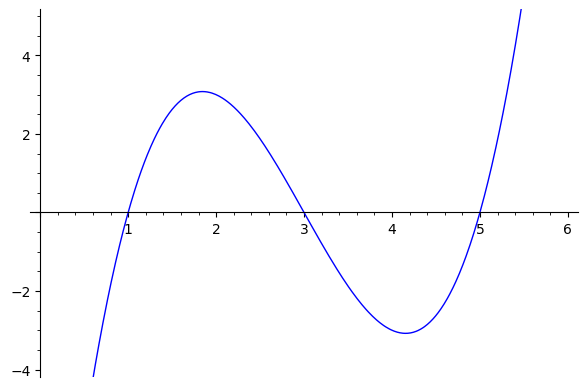

In [3]:
plot(y, (x, 0, 6), ymin=-4, ymax=5)

### Метод дихотомии.

In [5]:
def diсhotomy(func, left, right, eps=1e-15, visualization=False):
    '''
    func - функция, к которой применяем метод дихотомии
    left, right - границы интервала поиска решения
    eps - точность
    visualization - нужна ли визуализация?
    
    Возвращает: n(left) - численное решение уравнения func=0
                (n(left), plots_array) - решение уравнения и массив графиков для визуализации (если visualization == True)
                'Error' в случае ошибки
    '''
    
    func_plot = plot(y, (x, left-0.1, right+0.1), ymin=-4, ymax=5) # график функции
    plots_array = [] # массив графиков для визуализации
    point_left = left
    point_right = right # копируем границы интервала. эти копии будут использоваться при отображении подписей к графикам
    
    iterations = 0 # количество итераций (и отрисованных графиков) - чтобы знать, что их не меньше 6
    if not visualization:
        iterations = 6 # если графики рисовать не нужно, то не будем отслеживать количество итераций
    
    while abs(right - left) > eps or iterations < 6:
        mid = (left + right) / 2
        if func(x=left) * func(x=mid) > 0:
            left = mid
        elif func(x=right) * func(x=right) > 0:
            right = mid
        else:
            if visualization:
                return ('Error', None)
            else:
                return 'Error'
        
        if visualization:
            iterations += 1
            plots_array.append(((point((mid, func(mid)), color="red", size=100)) + func_plot)
                + text((r"$x={}, diff={}, iter={}$").format(mid, abs(func(mid)), iterations), ((point_left+point_right) / 2, -5), fontsize=14, color="black"))
        
    if visualization:
        return (n(left), plots_array)
    else:
        return n(left)

Проверим работу функции на следующих интервалах:
1. $[-1; 2.5]$
2. $[2,5; 4]$
3. $[4; 6]$

In [6]:
diсhotomy(y, -1, 2.5)

1.00000000000000

In [7]:
diсhotomy(y, 2.5, 4)

3.00000000000000

In [8]:
diсhotomy(y, 4, 6)

5.00000000000000

### Визуализация метода дихотомии.

Сгенерируем массив графиков для визуализации. Функция будет выводить графики 6 последних итераций.

Для большей наглядности и более быстрой работы точность снижена до двух знаков.

In [9]:
@interact
def diсhotomy_interactive(left=(0, 6, 0.5), right=(0, 6, 0.5)):
    print([left, right])
    if left >= right:
        print('Ошибка. Правая граница интервала должа быть больше левой.')
    else:
        result, plots = diсhotomy(y, left, right, eps=1e-2, visualization=True)
        if result == 'Error':
            print('Ошибка. На этом интервале не работает метод дихотомии (нет экстремума или их больше одного).')
        else:
            print('Ответ:', result)
            graphics_array([[plots[-6 + i], plots[-6 + i + 1]] for i in range(0, 6, 2)]).show(figsize=15)

Interactive function <function diсhotomy_interactive at 0x6fff33f83290> with 2 widgets
  left: FloatSlider(val…

### Метод Ньютона.

In [10]:
def newton(func, left, right, eps=1e-15, visualization=False):
    '''
    func - функция, к которой применяем метод Ньютона
    left, right - границы интервала поиска решения
    eps - точность
    visualization - нужна ли визуализация?
    
    Возвращает: next - численное решение уравнения func=0
                (next, plots_array) - решение уравнения и массив графиков для визуализации (если visualization == True)
    '''
    
    func_plot = plot(y, (x, left-0.1, right+0.1), ymin=-4, ymax=5) # график функции
    plots_array = [] # массив графиков для визуализации
    
    iterations = 0 # количество итераций (и отрисованных графиков) - чтобы знать, что их не меньше 6
    if not visualization:
        iterations = 6 # если графики рисовать не нужно, то не будем отслеживать количество итераций
    
    df = func.derivative()
    cur = left
    next = (left + right) / 2
    
    while abs(next - cur) > eps or iterations < 6:
        if visualization:
            iterations += 1
            tangent = func(x=cur) + df(x=cur) * (x - cur) # уравнение касательной в точке
            plots_array.append(((plot(tangent, (x, left-0.1, right+0.1), ymin=-9, ymax=5, color="red")) + func_plot)
                + text((r"$y={}$" + "\n" + r"$x={}, diff={}, iter={}$").format(latex(tangent), cur, abs(func(cur)), iterations), ((left + right) / 2, -5), fontsize=14, color="black"))
        
        cur = next
        next = cur - func(x=cur) / df(x=cur)
    
    if visualization:
        return (cur, plots_array)
    else:
        return cur    

Проверим работу функции на тех же интервалах.

In [11]:
newton(y, -1, 2.5)

1.00000000000000

In [12]:
newton(y, 2.5, 4)

3.00000000000000

In [13]:
newton(y, 4, 6)

5

### Визуализация метода Ньютона.

Сгенерируем массив графиков для визуализации. Функция будет выводить графики 6 последних итераций.

Для большей наглядности и более быстрой работы точность снижена до двух знаков.

In [14]:
@interact
def newton_interactive(left=(0, 6, 0.5), right=(0, 6, 0.5)):
    print([left, right])
    if left >= right:
        print('Ошибка. Правая граница интервала должа быть больше левой.')
    else:
        result, plots = newton(y, left, right, eps=1e-2, visualization=True)
        print('Ответ:', result)
        graphics_array([[plots[-6 + i], plots[-6 + i + 1]] for i in range(0, 6, 2)]).show(figsize=15)

Interactive function <function newton_interactive at 0x6fff32971830> with 2 widgets
  left: FloatSlider(value=…

Сравним полученные результаты с результатом функции solve().

In [15]:
solve(y, x)

[x == 1, x == 5, x == 3]

Результаты совпали. Все функции реализованы корректно.

## Часть 2 - полиномы, НОД.

1. Реализовать расширенный алгоритм Евклида.
2. Рассчитать НОД, сравнить его с результатом функции gcd().
3. Получить представление НОД в виде $u * f + v * g$ (тождество Безу).

Вариант 1.  
$f = x^4 - 4x^3 + 7x^2 - 5x + 1$  
$g = x^5 - x^4 - x^3 + x^2 + 5x - 5$

In [16]:
R.<x> = PolynomialRing(QQ) # Будем работать в кольце рациональных чисел
f = x**4 - 4*x**3 + 7*x**2 - 5*x + 1
g = x**5 - x**4 - x**3 + x**2 + 5*x - 5

In [17]:
show(f)

x^4 - 4*x^3 + 7*x^2 - 5*x + 1

In [18]:
show(g)

x^5 - x^4 - x^3 + x^2 + 5*x - 5

Для начала рассчитаем НОД при помощи встроенной функции gcd().

In [19]:
gcd_auto = gcd(f, g)
show(gcd_auto)

x - 1

### Расширенный алгоритм Евклида. Тождество Безу.

In [20]:
def ext_euclid(f, g):
    '''
    f,g - полиномы
    
    Функция возвращает тройку чисел (gcd, u, v):
    gcd - НОД полиномов f и g
    u, v - коэффициенты в разложении Безу
    '''
    u, uu, v, vv = 1, 0, 0, 1
    while g != 0:
        q = f // g
        r = f % g
        f, g = g, r
        u, uu = uu, u - uu*q
        v, vv = vv, v - vv*q
    return (f, u, v) 

In [21]:
gcd_euclid, u, v = ext_euclid(f, g)
show("GCD = ", gcd_euclid(x))
show("u = ", u(x))
show("v = ", v(x))

'GCD = ' 1936/441*x - 1936/441

'u = ' -16/21*x^3 - 128/441*x^2 + 656/441*x + 1264/441

'v = ' 16/21*x^2 - 880/441*x + 640/441

Нормируем полученные многочлены для последующей работы с ними.

In [22]:
gcd_euclid_norm = gcd_euclid / gcd_euclid.coefficients()[-1]
u_norm = u / gcd_euclid.coefficients()[-1]
v_norm = v / gcd_euclid.coefficients()[-1]
show("GCD = ", gcd_euclid_norm(x))
show("u = ", u_norm(x))
show("v = ", v_norm(x))

'GCD = ' x - 1

'u = ' -21/121*x^3 - 8/121*x^2 + 41/121*x + 79/121

'v = ' 21/121*x^2 - 5/11*x + 40/121

Результат, полученный при помощи алгоритма Евклида, совпал с результатом, полученным с помощью функции gcd(). Следовательно НОД полиномов $f$ и $g$ равен $x-1$.

При помощи расширенного алгоритма Евклида вычислили коэффициенты в разложении Безу. Проверим корректность найденных коэффициентов.

In [23]:
u_norm * f + v_norm * g

x - 1

Полученный результат совпал с НОД, значит найденные коэффициенты верны. Алгоритм работает корректно.

## Часть 3 - приведение поверхности второго порядка к каноническому виду

1. Привести поверхность, заданную уравнением, к каноническому виду.
2. Построить исходную поверхность и поверхность в каноническом виде.
3. Собственные числа и вектора рассчитать вручную, сравнить с результатом встроенных функций.

Вариант 1.  
$f = 7x^2 + 8xy + 3y^2 + 8xz + 6yz + 3z^2 + 6x + y + 7$

In [24]:
var("x y z")
f(x, y, z) = 7*x**2 + 8*x*y + 3*y**2 + 8*x*z + 6*y*z + 3*z**2 + 6*x + y + 7

In [25]:
show(f(x, y, z))

7*x^2 + 8*x*y + 3*y^2 + 8*x*z + 6*y*z + 3*z^2 + 6*x + y + 7

Построим исходную поверхность.

In [35]:
implicit_plot3d(f(x=x, y=y, z=z), (x, -30, 10), (y, -30, 10), (z, -10, 30))

Graphics3d Object

Составим матрицу А для квадратичной формы и матрицу B, состоящую из коэффициентов квадратичной формы, линейной формы и свободного члена.

In [27]:
A = matrix([
    [7, 4, 4],
    [4, 3, 3],
    [4, 3, 3]
])
B = matrix([
    [7, 4, 4, 6],
    [4, 3, 3, 1],
    [4, 3, 3, 0],
    [6, 1, 0, 7]
])

Вычислим ортогональные инварианты.

In [28]:
t1 = A.trace()
t2 = A[0:2, 0:2].det() + A[[0, 2], [0, 2]].det() + A[1:3, 1:3].det()
d = A.det()
delta = B.det()
show("t1 = ", t1)
show("t2 = ", t2)
show("d = ", d)
show("delta = ", delta)

't1 = ' 13

't2 = ' 10

'd = ' 0

'delta = ' -5

По вычисленным ортогональным инвариантам можем определить тип поверхности - эллиптический парабалоид.

Найдем собственные значения матрицы А.

In [29]:
var("ev")
E = matrix([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

eigen_values = []
for eigen_value in solve((A - ev * E).det() == 0, ev):
    print(eigen_value.simplify(), '==', n(eigen_value.rhs()))
    eigen_values.append(eigen_value.rhs())

ev == -1/2*sqrt(129) + 13/2 == 0.821091654199726
ev == 1/2*sqrt(129) + 13/2 == 12.1789083458003
ev == 0 == 0.000000000000000


Теперь найдем собственные значения через встроенную функцию.

In [30]:
for eigen_value in A.eigenvalues():
    print(eigen_value)

0
0.821091654199727?
12.17890834580028?


Результаты вычисления собственных значений совпали.

Теперь составим каноническое уравнение поверхности. Сначала определим коэффициенты для нового уравнения.

In [31]:
a = n(1 / sqrt(-delta / (eigen_values[0]**2 * t2)))
b = n(1 / sqrt(-delta / (eigen_values[1]**2 * t2)))

In [32]:
var("x1 y1 z1")
f_canonical(x1, y1, z1) = x1**2 * a + y1**2 * b - 2*z1
show(f_canonical(x1, y1, z1))

1.16119895332061*x1^2 + 17.2235773575296*y1^2 - 2*z1

Построим полученную поверхность.

In [33]:
implicit_plot3d(f_canonical(x1=x1, y1=y1, z1=z1), (x1, -30, 10), (y1, -30, 10), (z1, -10, 30))

Graphics3d Object